In [1]:
import pandas as pd
import dataframe_image as dfi
import numpy as np

from nltk.corpus import wordnet as wn
import nltk
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox


import warnings
warnings.filterwarnings("ignore")


/Users/hannahb./Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Concreteness Score dataset

In [2]:
# https://link.springer.com/article/10.3758/s13428-013-0403-5#MOESM1

df2 = pd.read_csv("concreteness.csv")
df2

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX
0,a,0,1.46,1.14,2,30,0.933333,1041179
1,aardvark,0,4.68,0.86,0,28,1.000000,21
2,aback,0,1.65,1.07,4,27,0.851852,15
3,abacus,0,4.52,1.12,2,29,0.931034,12
4,abandon,0,2.54,1.45,1,27,0.962963,413
...,...,...,...,...,...,...,...,...
39949,zebra crossing,1,4.56,0.75,1,28,0.964286,0
39950,zero tolerance,1,2.21,1.45,0,29,1.000000,0
39951,ZIP code,1,3.77,1.59,0,30,1.000000,0
39952,zoom in,1,3.57,1.40,0,28,1.000000,0


In [3]:
def make_pie(df,column,title,fname):
    df["bucket"] = (df[column].round(1))
    counts = df["bucket"].value_counts().sort_index()
    proportions = counts / counts.sum()

    # styling
    colors = [
        "#F7B7D6",  # soft header pink
        "#FDECF7",  # pale blush
        "#FFE6F2",  # gentle pastel
        "#F7D4E7",  # slightly deeper
        "#EEC2D7",
        "#F4DCEA"
    ]
    # repeat if needed
    if len(proportions) > len(colors):
        repeats = int(np.ceil(len(proportions) / len(colors)))
        colors = (colors * repeats)[:len(proportions)]

    fig, ax = plt.subplots(figsize=(7, 7))

    patches, texts, autotexts = ax.pie(
        proportions,
        labels=proportions.index,
        autopct="%1.1f%%",
        colors=colors,
        startangle=90,
        wedgeprops={"edgecolor": "#E2A8C9", "linewidth": 1.2}
    )
    # label styling
    for t in texts:
        t.set_color("#6A2E5C")
        t.set_fontsize(11)

    for t in autotexts:
        t.set_color("#4A2B3B")
        t.set_fontsize(10)
        t.set_weight("bold")

    ax.set_title(
        "Concreteness Proportions",
        fontsize=18,
        fontweight="bold",
        color="#C84C9A",
        pad=18
    )

    ax.set_ylabel("")

   
    plt.ylabel("")
    plt.rcParams["font.family"] = "DejaVu Sans"

    plt.title(title)
    plt.tight_layout()
    plt.savefig(fname)
    plt.show()

    df = df.drop(columns=["bucket"])


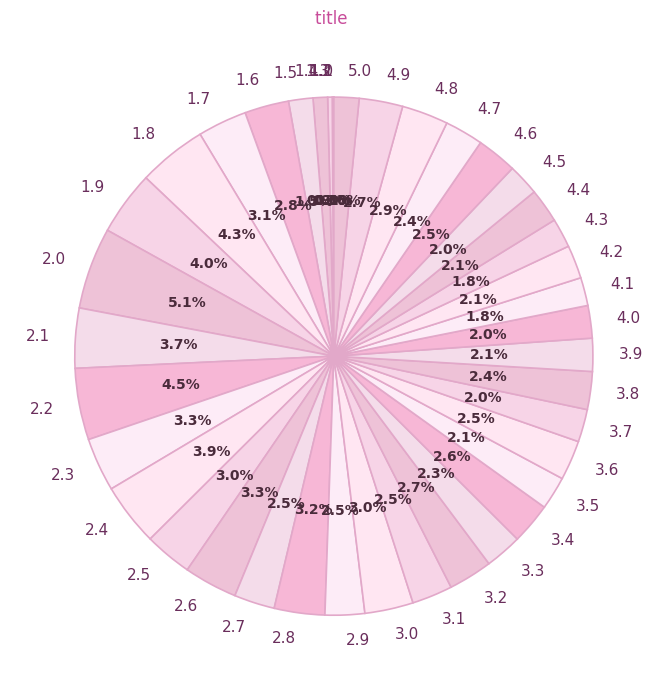

In [4]:
make_pie(df2, "Conc.M", "title ","figures/Conreteness_40K_pie.png")

In [5]:
def plot_table(df, title,fname):
    dfsmall = df.head(10)

    # modest friendly font
    plt.rcParams["font.family"] = "DejaVu Sans"

    fig, ax = plt.subplots(figsize=(14, 4))
    ax.axis("off")

    ax.set_title(
        title,
        fontsize=18,
        fontweight="bold",
        color="#C84C9A",   # modest berry-pink
        pad=22
    )

    header_color   = "#F7B7D6"         # soft muted pink
    header_border  = "#E08BB8"         # gentle berry edge
    row_colors     = ["#FFF6FB", "#FDECF7"]  # very light alternating blush
    text_color     = "#6A2E5C"         # restrained plum
    border_color   = "#E2A8C9"         # lighter pastel border

    tbl = ax.table(
        cellText=dfsmall.values,
        colLabels=dfsmall.columns,
        loc="center",
        cellLoc="center"
    )

    tbl.auto_set_font_size(False)
    tbl.set_fontsize(11)
    tbl.scale(1, 1.55)

    # HEADER STYLE (calmer)
    for (row, col), cell in tbl.get_celld().items():
        if row == 0:
            cell.set_facecolor(header_color)
            cell.set_edgecolor(header_border)
            cell.set_linewidth(1.4)
            cell.set_text_props(
                color="#4A2B3B",   # muted chocolate-plum
                weight="bold",
                fontsize=12
            )
        else:
            cell.set_facecolor(row_colors[(row - 1) % 2])
            cell.set_text_props(color=text_color)
            cell.set_edgecolor(border_color)
            cell.set_linewidth(1.0)

    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()

    table_bbox = tbl.get_window_extent(renderer)
    title_bbox = ax.title.get_window_extent(renderer)

    table_bbox_inches = table_bbox.transformed(fig.dpi_scale_trans.inverted())
    title_bbox_inches = title_bbox.transformed(fig.dpi_scale_trans.inverted())

    full_bbox = Bbox.from_extents(
        min(table_bbox_inches.x0, title_bbox_inches.x0),
        min(table_bbox_inches.y0, title_bbox_inches.y0),
        max(table_bbox_inches.x1, title_bbox_inches.x1),
        max(table_bbox_inches.y1, title_bbox_inches.y1),
    )

    fig.savefig(
        fname,
        dpi=300,
        bbox_inches=full_bbox,
        pad_inches=0.06,
    )
    plt.show()
    plt.close(fig)

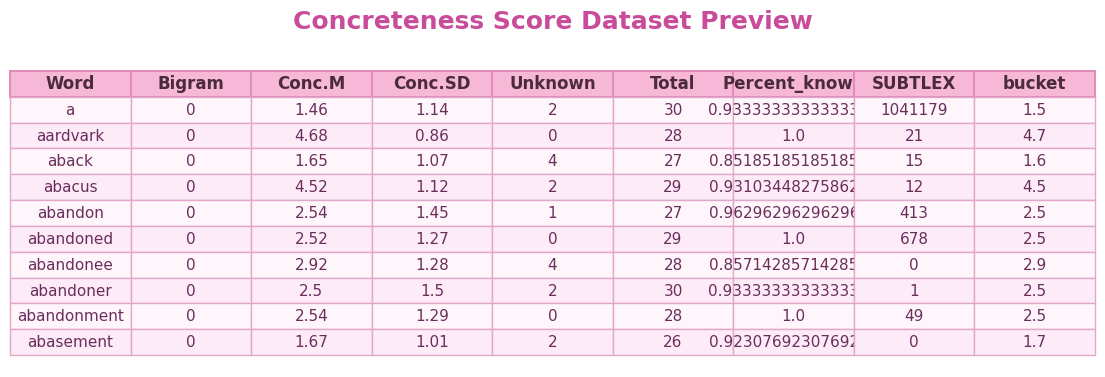

In [6]:
#df2 = df2.drop(columns=["bucket"])

plot_table(df2,"Concreteness Score Dataset Preview" ,"figures/Conreteness_40K_table.png")

In [7]:
# lookup table for concreteness for each word
conc = df2.set_index("Word")["Conc.M"]
conc

Word
a                 1.46
aardvark          4.68
aback             1.65
abacus            4.52
abandon           2.54
                  ... 
zebra crossing    4.56
zero tolerance    2.21
ZIP code          3.77
zoom in           3.57
zoom lens         4.81
Name: Conc.M, Length: 39954, dtype: float64

### WordNet: Synset_id and corresponding words dataset

In [8]:
df_synsets = pd.read_pickle("synsets.pkl")
df_synsets

,synset_id,words
0,n00001740,[entity]
1,n00001930,[physical entity]
2,n00002137,"[abstraction, abstract entity]"
3,n00002452,[thing]
4,n00002684,"[object, physical object]"
...,...,...
82110,n15299225,[study hall]
82111,n15299367,"[Transfiguration, Transfiguration Day, August 6]"
82112,n15299585,[usance]
82113,n15299783,[window]


In [9]:
def synset_name(sid):
    pos = sid[0]          # "n"
    offset = int(sid[1:]) # e.g., 15299783
    s = wn.synset_from_pos_and_offset(pos, offset)
    return s.name()       # e.g., "canine.n.02"

def clean_synset_name(name):
    lemma = name.split(".")[0]          # "study_hall.n.01"
    return lemma.replace("_", " ")      # "study hall"

df_synsets["synset_name"] = df_synsets["synset_id"].apply(synset_name)
df_synsets["synset_name"] = df_synsets["synset_name"].apply(clean_synset_name)

df_synsets

,synset_id,words,synset_name
0,n00001740,[entity],entity
1,n00001930,[physical entity],physical entity
2,n00002137,"[abstraction, abstract entity]",abstraction
3,n00002452,[thing],thing
4,n00002684,"[object, physical object]",object
...,...,...,...
82110,n15299225,[study hall],study hall
82111,n15299367,"[Transfiguration, Transfiguration Day, August 6]",transfiguration
82112,n15299585,[usance],usance
82113,n15299783,[window],window


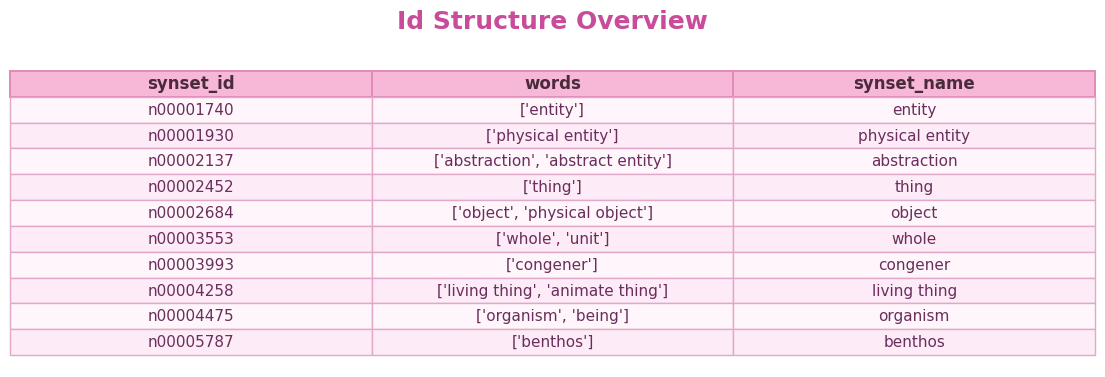

In [10]:
plot_table(df_synsets, "Id Structure Overview", "figures/Synset_id_words_name.png")

### Functions for traversing Synset Tree 

In [11]:
# traverse tree up until score is above threshold
def nearest_valid_ancestor(score_col, synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    for path in s.hypernym_paths():
        for anc in reversed(path):
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh: # here threshold is used
                return anc_id
    return None

In [12]:
def nearest_valid_ancestor(score_col, synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    for path in s.hypernym_paths():
        for anc in reversed(path):
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                return anc_id
    return None

def trace_hypernym_traversal(score_col, synset_id, thresh):
    """
    Returns a string describing the sequence of synsets traversed
    until the threshold-valid ancestor is found.
    """
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return "invalid synset id"

    traces = []

    for path in s.hypernym_paths():
        collected = []
        for anc in reversed(path):
            collected.append(anc.name())   # store readable name
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                traces.append(" → ".join(collected))
                break

        if traces:
            return traces[0]

    return "no ancestor meets threshold"


### Assigning synset_ids concreteness scores by id name Approach 1:

Use score of synset id name

In [13]:
# returns the score of word with the largest value
def max_conc(words):
    vals = conc.reindex(np.array([words]))
    return vals.max()

# returns the word with the largest value
def most_concrete(words):
    vals = conc.reindex(np.array([words]))       
    return vals.idxmax()   

# apply concreteness score to every synset id in wordnet (82k)
df_synsets["concreteness"] = df_synsets["synset_name"].apply(max_conc).fillna(0)
df_synsets

,synset_id,words,synset_name,concreteness
0,n00001740,[entity],entity,2.68
1,n00001930,[physical entity],physical entity,0.00
2,n00002137,"[abstraction, abstract entity]",abstraction,1.57
3,n00002452,[thing],thing,3.17
4,n00002684,"[object, physical object]",object,3.66
...,...,...,...,...
82110,n15299225,[study hall],study hall,0.00
82111,n15299367,"[Transfiguration, Transfiguration Day, August 6]",transfiguration,2.35
82112,n15299585,[usance],usance,0.00
82113,n15299783,[window],window,4.86


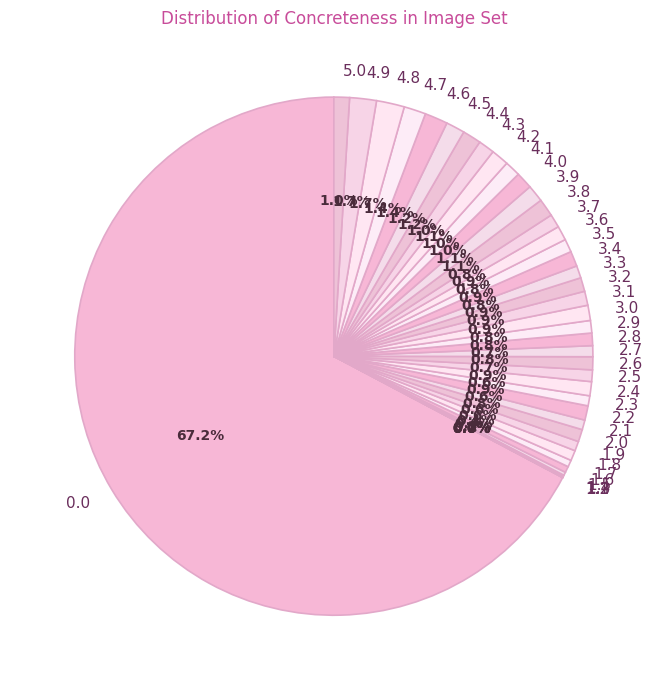

In [14]:
make_pie(df_synsets,"concreteness", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
df_synsets = df_synsets.drop(columns=["bucket"])

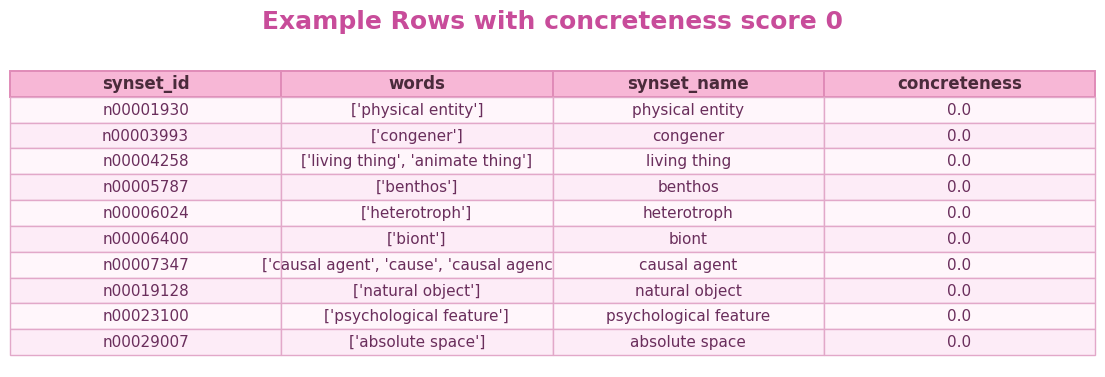

In [15]:
df_synsets_subset = df_synsets[df_synsets["concreteness"] == 0]
plot_table(df_synsets_subset, "Example Rows with concreteness score 0", "figures/Synset_id_words_name_0.png")

In [18]:
# look up for scores for synset ids
# this contains a score for each id
synset_scores = df_synsets.set_index("synset_id")["concreteness"]
synset_scores

synset_id
n00001740    2.68
n00001930    0.00
n00002137    1.57
n00002452    3.17
n00002684    3.66
             ... 
n15299225    0.00
n15299367    2.35
n15299585    0.00
n15299783    4.86
n15300051    0.00
Name: concreteness, Length: 82115, dtype: float64

### Applying scores to the 1000 labels of the images

In [21]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict)
df1

,synset_id,description,score
0,n01440764,"tench, Tinca tinca",0.00
1,n01443537,"goldfish, Carassius auratus",4.79
2,n01484850,"great white shark, white shark, man-eater, man...",0.00
3,n01491361,"tiger shark, Galeocerdo cuvieri",0.00
4,n01494475,"hammerhead, hammerhead shark",4.28
...,...,...,...
995,n13044778,earthstar,0.00
996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ...",0.00
997,n13054560,bolete,0.00
998,n13133613,"ear, spike, capitulum",5.00


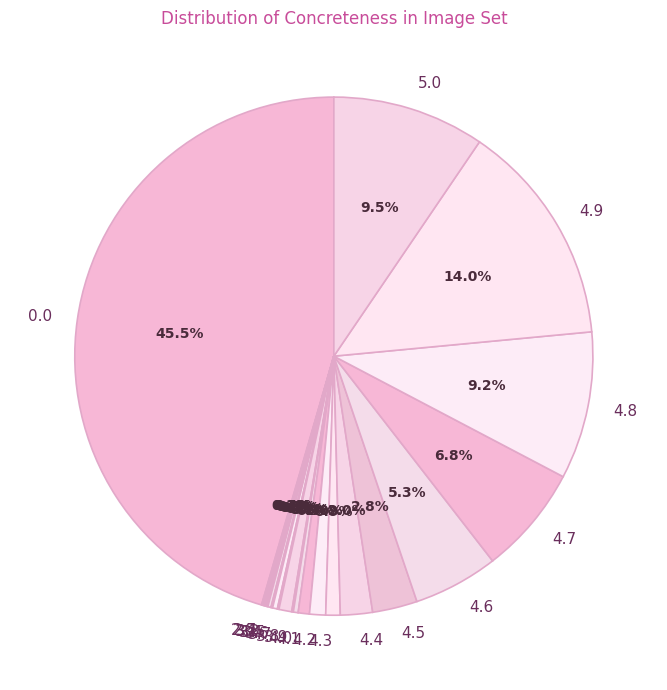

In [23]:
make_pie(df1,"score", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
df1 = df1.drop(columns=["bucket"])

### Applying Scores to the 50000 images


In [ ]:
img_df = pd.read_csv("LOC_val_solution.csv") # contains image id and bounding box with id
img_df["synset"] = img_df["PredictionString"].astype(str).str[:9] # take first id
img_df

In [28]:
# https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data?select=LOC_synset_mapping.txt

img_df = pd.read_csv("LOC_val_solution.csv") # contains image id and bounding box with id
img_df["synset_id"] = img_df["PredictionString"].astype(str).str[:9] # take first id
score_dict = dict(synset_scores)
img_df["score"] = img_df["synset_id"].map(score_dict)
img_df

,ImageId,PredictionString,synset_id,score
0,ILSVRC2012_val_00048981,n03995372 85 1 499 272,n03995372,0.00
1,ILSVRC2012_val_00037956,n03481172 131 0 499 254,n03481172,4.77
2,ILSVRC2012_val_00026161,n02108000 38 0 464 280,n02108000,0.00
3,ILSVRC2012_val_00026171,n03109150 0 14 216 299,n03109150,4.85
4,ILSVRC2012_val_00008726,n02119789 255 142 454 329 n02119789 44 21 322 ...,n02119789,0.00
...,...,...,...,...
49995,ILSVRC2012_val_00005961,n03388043 103 0 279 472,n03388043,4.77
49996,ILSVRC2012_val_00008801,n03089624 101 286 170 374 n03089624 236 282 30...,n03089624,3.75
49997,ILSVRC2012_val_00008176,n01518878 82 98 439 498,n01518878,4.71
49998,ILSVRC2012_val_00004764,n03874293 91 111 490 420,n03874293,0.00


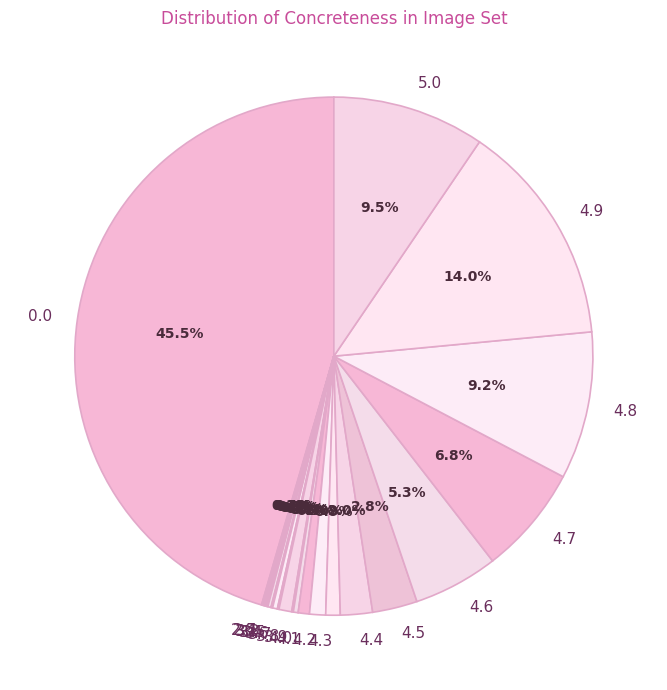

In [29]:
make_pie(img_df,"score", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
img_df = img_df.drop(columns=["bucket"])

In [31]:
              
# String of words into list of words
df1["description"] = df1["description"].str.split(r"\s*,\s*")
df1

,synset_id,description,score
0,n01440764,"[tench, Tinca tinca]",0.00
1,n01443537,"[goldfish, Carassius auratus]",4.79
2,n01484850,"[great white shark, white shark, man-eater, ma...",0.00
3,n01491361,"[tiger shark, Galeocerdo cuvieri]",0.00
4,n01494475,"[hammerhead, hammerhead shark]",4.28
...,...,...,...
995,n13044778,[earthstar],0.00
996,n13052670,"[hen-of-the-woods, hen of the woods, Polyporus...",0.00
997,n13054560,[bolete],0.00
998,n13133613,"[ear, spike, capitulum]",5.00


In [35]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict)
df1

,synset_id,description,score
0,n01440764,"tench, Tinca tinca",0.00
1,n01443537,"goldfish, Carassius auratus",4.79
2,n01484850,"great white shark, white shark, man-eater, man...",0.00
3,n01491361,"tiger shark, Galeocerdo cuvieri",0.00
4,n01494475,"hammerhead, hammerhead shark",4.28
...,...,...,...
995,n13044778,earthstar,0.00
996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ...",0.00
997,n13054560,bolete,0.00
998,n13133613,"ear, spike, capitulum",5.00


In [ ]:
# give NaN lowest score of 0 since they dont contain a single word used in 40k concreteness
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict)

def assign_new_synsetid(df, col, thresh = 4):
    #df["concreteness"] = df["description"].apply(max_conc).fillna(0)
    thresh = 4.9 # set threshold for concreteness score
    df["mapped_synset_list"] = df.apply(
        lambda row:
            row["synset_id"] if row["score"] >= thresh
            else trace_hypernym_traversal(synset_scores,row["synset_id"], thresh),
        axis=1)
    df["mapped_synset"] = df.apply(
        lambda row:
            row["synset_id"] if row["score"] >= thresh
            else nearest_valid_ancestor(synset_scores,row["synset_id"], thresh),
        axis=1)
    df["mapped_score"] = df["mapped_synset"].map(synset_scores)
    # Create a lookup from synset_id → words list
    synset_words_lookup = df_synsets.set_index("synset_id")["words"]
    # Add a column in df1 for the mapped word list
    df["mapped_word_list"] = df["mapped_synset"].map(synset_words_lookup)
    return df

assign_new_synsetid(df1, "description", 4.7)
df1

,synset_id,description,score,mapped_synset_list,mapped_synset,mapped_score,mapped_word_list
0,n01440764,"tench, Tinca tinca",0.00,tench.n.01 → cyprinid.n.01 → cypriniform_fish....,n02512053,5.00,[fish]
1,n01443537,"goldfish, Carassius auratus",4.79,goldfish.n.01 → cyprinid.n.01 → cypriniform_fi...,n02512053,5.00,[fish]
2,n01484850,"great white shark, white shark, man-eater, man...",0.00,great_white_shark.n.01 → mackerel_shark.n.01 →...,n01482330,4.93,[shark]
3,n01491361,"tiger shark, Galeocerdo cuvieri",0.00,tiger_shark.n.01 → requiem_shark.n.01 → shark....,n01482330,4.93,[shark]
4,n01494475,"hammerhead, hammerhead shark",4.28,hammerhead.n.03 → shark.n.01,n01482330,4.93,[shark]
...,...,...,...,...,...,...,...
995,n13044778,earthstar,0.00,no ancestor meets threshold,None,NaN,NaN
996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ...",0.00,no ancestor meets threshold,None,NaN,NaN
997,n13054560,bolete,0.00,no ancestor meets threshold,None,NaN,NaN
998,n13133613,"ear, spike, capitulum",5.00,n13133613,n13133613,5.00,"[ear, spike, capitulum]"


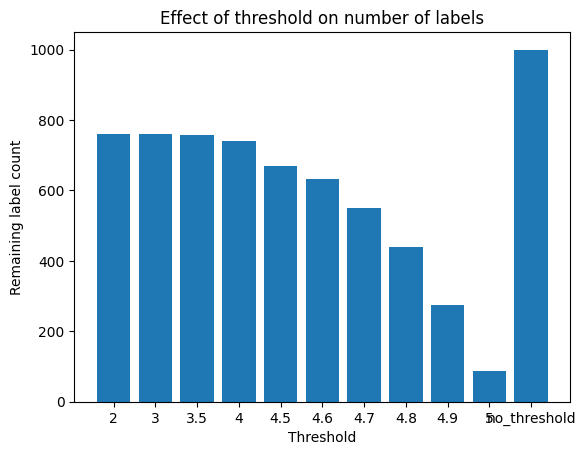

{2: 761,
 3: 761,
 3.5: 758,
 4: 739,
 4.5: 670,
 4.6: 632,
 4.7: 550,
 4.8: 440,
 4.9: 274,
 5: 87,
 'no_threshold': 1000}

In [41]:

# convert to dict if needed
score_dict = dict(synset_scores)

# assign NaN => 0
df1["score"] = df1["synset_id"].map(score_dict).fillna(0)

# wrapper: apply your existing mapping but with custom threshold
def run_mapping(df, threshold):
    d = df.copy()
    d["score"] = d["synset_id"].map(score_dict).fillna(0)

    d["mapped_synset_list"] = d.apply(
        lambda row:
            row["synset_id"] if row["score"] >= threshold
            else trace_hypernym_traversal(synset_scores, row["synset_id"], threshold),
        axis=1,
    )
    d["mapped_synset"] = d.apply(
        lambda row:
            row["synset_id"] if row["score"] >= threshold
            else nearest_valid_ancestor(synset_scores, row["synset_id"], threshold),
        axis=1,
    )

    d["mapped_score"] = d["mapped_synset"].map(score_dict).fillna(0)
    return d


thresholds = [2,3,3.5,4,4.5 ,4.6,4.7,4.8,4.9,5]
results = {}

for t in thresholds:
    mapped = run_mapping(df1, t)
    # number of *unique* mapped labels remaining
    n_labels = mapped["mapped_synset"].nunique()
    results[t] = n_labels

# also include the original reference
results["no_threshold"] = df1["synset_id"].nunique()

# --------------------------
# MAKE A GRAPH
# --------------------------

fig, ax = plt.subplots()
x = list(results.keys())
y = list(results.values())

ax.bar([str(v) for v in x], y)
ax.set_xlabel("Threshold")
ax.set_ylabel("Remaining label count")
ax.set_title("Effect of threshold on number of labels")

plt.show()

# show numeric result
results


In [ ]:
print(df1["description"].nunique())
print(df1["mapped_word_list"].nunique())

TypeError: unhashable type: 'list'

### Assigning synset_ids concreteness scores Approach 2:

Use most concrete word in wordlist

In [93]:
# returns the score of word with the largest value
def max_conc(words):
    vals = conc.reindex(words)
    return vals.max()

# returns the word with the largest value
def most_concrete(words):
    vals = conc.reindex(words)       
    return vals.idxmax()   

# apply concreteness score to every synset id in wordnet (82k)
df_synsets["concreteness"] = df_synsets["words"].apply(max_conc).fillna(0)
df_synsets["most_concrete_word"] = df_synsets["words"].apply(most_concrete)
df_synsets

,synset_id,words,synset_name,concreteness,most_concrete_word
0,n00001740,[entity],entity,2.68,entity
1,n00001930,[physical entity],physical entity,0.00,NaN
2,n00002137,"[abstraction, abstract entity]",abstraction,1.57,abstraction
3,n00002452,[thing],thing,3.17,thing
4,n00002684,"[object, physical object]",object,3.66,object
...,...,...,...,...,...
82110,n15299225,[study hall],study hall,0.00,NaN
82111,n15299367,"[Transfiguration, Transfiguration Day, August 6]",transfiguration,0.00,NaN
82112,n15299585,[usance],usance,0.00,NaN
82113,n15299783,[window],window,4.86,window


In [94]:
# look up for scores for synset ids
synset_scores = df_synsets.set_index("synset_id")["concreteness"]
synset_scores

synset_id
n00001740    2.68
n00001930    0.00
n00002137    1.57
n00002452    3.17
n00002684    3.66
             ... 
n15299225    0.00
n15299367    0.00
n15299585    0.00
n15299783    4.86
n15300051    0.00
Name: concreteness, Length: 82115, dtype: float64

In [95]:
# traverse tree up until score is above threshold
def nearest_valid_ancestor(synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    for path in s.hypernym_paths():
        for anc in reversed(path):
            anc_id = f"{pos}{anc.offset():08d}"
            score = synset_scores.get(anc_id, None)
            if score is not None and score >= thresh: # here threshold is used
                return anc_id
    return None

In [96]:
# https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data?select=LOC_synset_mapping.txt

df1 = pd.read_csv("nxx_words.csv") # validation dataset containing image id and correct synset id

              
# String of words into list of words
df1["word_list"] = df1["description"].str.split(r"\s*,\s*")

# add word with highest score
df1["most concrete word"] = df1["word_list"].apply(most_concrete)

# give NaN lowest score of 0 since they dont contain a single word used in 40k concreteness
df1["concreteness"] = df1["word_list"].apply(max_conc).fillna(0)

# set threshold for concreteness score
thresh = 4
df1["mapped_synset"] = df1.apply(
    lambda row:
        row["synset_id"] if row["concreteness"] >= thresh
        else nearest_valid_ancestor(row["synset_id"], thresh),
    axis=1
)

df1["mapped_concreteness"] = df1["mapped_synset"].map(synset_scores)

# Create a lookup from synset_id → words list
synset_words_lookup = df_synsets.set_index("synset_id")["words"]

# Add a column in df1 for the mapped word list
df1["mapped_word_list"] = df1["mapped_synset"].map(synset_words_lookup)

# description is redundant
df1 = df1.drop(columns=["description"])
df1

,synset_id,word_list,most concrete word,concreteness,mapped_synset,mapped_concreteness,mapped_word_list
0,n01440764,"[tench, Tinca tinca]",NaN,0.00,n02512053,5.00,[fish]
1,n01443537,"[goldfish, Carassius auratus]",goldfish,4.79,n01443537,4.79,"[goldfish, Carassius auratus]"
2,n01484850,"[great white shark, white shark, man-eater, ma...",NaN,0.00,n01482330,4.93,[shark]
3,n01491361,"[tiger shark, Galeocerdo cuvieri]",NaN,0.00,n01482330,4.93,[shark]
4,n01494475,"[hammerhead, hammerhead shark]",hammerhead,4.28,n01494475,4.28,"[hammerhead, hammerhead shark]"
...,...,...,...,...,...,...,...
995,n13044778,[earthstar],NaN,0.00,n12992868,4.59,[fungus]
996,n13052670,"[hen-of-the-woods, hen of the woods, Polyporus...",NaN,0.00,n12992868,4.59,[fungus]
997,n13054560,[bolete],NaN,0.00,n12992868,4.59,[fungus]
998,n13133613,"[ear, spike, capitulum]",ear,5.00,n13133613,5.00,"[ear, spike, capitulum]"


In [46]:
df1.to_csv('Mapped_1k_words_score_4.csv', index=False)

TimeoutError: [Errno 60] Operation timed out: 'Mapped_1k_words_score_4.csv'

In [140]:
# https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data?select=LOC_synset_mapping.txt

df1 = pd.read_csv("nxx_words.csv") # validation dataset containing image id and correct synset id

              
# String of words into list of words
df1["word_list"] = df1["description"].str.split(r"\s*,\s*")

# add word with highest score
df1["most concrete word"] = df1["word_list"].apply(most_concrete)

# give NaN lowest score of 0 since they dont contain a single word used in 40k concreteness
df1["concreteness"] = df1["word_list"].apply(max_conc).fillna(0)

# set threshold for concreteness score
thresh = 4
df1["mapped_synset"] = df1.apply(
    lambda row:
        row["synset_id"] if row["concreteness"] >= thresh
        else nearest_valid_ancestor(synset_scores,row["synset_id"], thresh),
    axis=1
)

df1["mapped_concreteness"] = df1["mapped_synset"].map(synset_scores)

# Create a lookup from synset_id → words list
synset_words_lookup = df_synsets.set_index("synset_id")["words"]

# Add a column in df1 for the mapped word list
df1["mapped_word_list"] = df1["mapped_synset"].map(synset_words_lookup)

# description is redundant
df1 = df1.drop(columns=["description"])
df1

,synset_id,word_list,most concrete word,concreteness,mapped_synset,mapped_concreteness,mapped_word_list
0,n01440764,"[tench, Tinca tinca]",NaN,0.0,n02512053,5.00,[fish]
1,n01443537,"[goldfish, Carassius auratus]",NaN,0.0,n01443537,4.79,"[goldfish, Carassius auratus]"
2,n01484850,"[great white shark, white shark, man-eater, ma...",NaN,0.0,n01482330,4.93,[shark]
3,n01491361,"[tiger shark, Galeocerdo cuvieri]",NaN,0.0,n01482330,4.93,[shark]
4,n01494475,"[hammerhead, hammerhead shark]",NaN,0.0,n01494475,4.28,"[hammerhead, hammerhead shark]"
...,...,...,...,...,...,...,...
995,n13044778,[earthstar],NaN,0.0,n12992868,4.59,[fungus]
996,n13052670,"[hen-of-the-woods, hen of the woods, Polyporus...",NaN,0.0,n12992868,4.59,[fungus]
997,n13054560,[bolete],NaN,0.0,n12992868,4.59,[fungus]
998,n13133613,"[ear, spike, capitulum]",NaN,0.0,n13133613,5.00,"[ear, spike, capitulum]"


### Looking at the images of mapped names

In [155]:
# https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data?select=LOC_synset_mapping.txt

img_df = pd.read_csv("LOC_val_solution.csv") 

img_df['Box_pos'] = img_df['PredictionString'].astype(str).str[9:]
img_df['PredictionString'] = img_df['PredictionString'].astype(str).str[:9]
img_df.to_csv("Loc_val_1_object_sol.csv")

In [156]:
words_1k = pd.read_csv("nxx_words.csv")
words_1k

,synset_id,description
0,n01440764,"tench, Tinca tinca"
1,n01443537,"goldfish, Carassius auratus"
2,n01484850,"great white shark, white shark, man-eater, man..."
3,n01491361,"tiger shark, Galeocerdo cuvieri"
4,n01494475,"hammerhead, hammerhead shark"
...,...,...
995,n13044778,earthstar
996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ..."
997,n13054560,bolete
998,n13133613,"ear, spike, capitulum"


In [198]:
merged = img_df.merge(df1, left_on="PredictionString", right_on="synset_id", how="left")

merged = merged.dropna(how="all")
df1 = df1.dropna(how="all")
merged.dropna(inplace=True)
df1.dropna(inplace=True)
merged

,ImageId,PredictionString,Box_pos,synset_id,word_list,concreteness,mapped_synset_list,mapped_synset,mapped_concreteness,mapped_word_list
3,ILSVRC2012_val_00026171,n03109150,0 14 216 299,n03109150,"[corkscrew, bottle screw]",0.0,corkscrew.n.01 → bottle_opener.n.01,n02877962,4.96,[bottle opener]
4,ILSVRC2012_val_00008726,n02119789,255 142 454 329 n02119789 44 21 322 295,n02119789,"[kit fox, Vulpes macrotis]",0.0,kit_fox.n.01 → fox.n.01,n02118333,4.97,[fox]
8,ILSVRC2012_val_00020622,n02643566,37 1 395 327,n02643566,[lionfish],0.0,lionfish.n.01 → scorpaenid.n.01 → scorpaenoid....,n02512053,5.00,[fish]
9,ILSVRC2012_val_00045582,n04131690,113 143 237 422,n04131690,"[saltshaker, salt shaker]",0.0,saltshaker.n.01,n04131690,4.96,"[saltshaker, salt shaker]"
10,ILSVRC2012_val_00023499,n02815834,17 162 400 498,n02815834,[beaker],0.0,beaker.n.01 → jar.n.01,n03593526,5.00,[jar]
...,...,...,...,...,...,...,...,...,...,...
49991,ILSVRC2012_val_00037917,n03325584,0 161 486 497,n03325584,"[feather boa, boa]",0.0,feather_boa.n.01 → scarf.n.01,n04143897,4.97,[scarf]
49992,ILSVRC2012_val_00043343,n03804744,220 17 323 103 n03804744 284 210 300 225,n03804744,[nail],0.0,nail.n.02,n03804744,4.93,[nail]
49994,ILSVRC2012_val_00039369,n02071294,161 75 334 241,n02071294,"[killer whale, killer, orca, grampus, sea wolf...",0.0,killer_whale.n.01 → dolphin.n.02,n02068974,4.96,[dolphin]
49997,ILSVRC2012_val_00008176,n01518878,82 98 439 498,n01518878,"[ostrich, Struthio camelus]",0.0,ostrich.n.02 → ratite.n.01 → bird.n.01,n01503061,5.00,[bird]


In [210]:
def synset_name(sid):
    pos = sid[0]          # "n"
    offset = int(sid[1:]) # e.g., 15299783
    s = wn.synset_from_pos_and_offset(pos, offset)
    return s.name()       # e.g., "canine.n.02"

def clean_synset_name(name):
    lemma = name.split(".")[0]          # "study_hall.n.01"
    return lemma.replace("_", " ")      # "study hall"

merged["mapped_name"] = merged["mapped_synset"].apply(synset_name)
merged.dropna(inplace=True)

merged["mapped_name"] = merged["mapped_name"].apply(clean_synset_name)

merged

,ImageId,PredictionString,Box_pos,synset_id,word_list,concreteness,mapped_synset_list,mapped_synset,mapped_concreteness,mapped_word_list,mapped_name
3,ILSVRC2012_val_00026171,n03109150,0 14 216 299,n03109150,"[corkscrew, bottle screw]",0.0,corkscrew.n.01 → bottle_opener.n.01,n02877962,4.96,[bottle opener],bottle opener
4,ILSVRC2012_val_00008726,n02119789,255 142 454 329 n02119789 44 21 322 295,n02119789,"[kit fox, Vulpes macrotis]",0.0,kit_fox.n.01 → fox.n.01,n02118333,4.97,[fox],fox
8,ILSVRC2012_val_00020622,n02643566,37 1 395 327,n02643566,[lionfish],0.0,lionfish.n.01 → scorpaenid.n.01 → scorpaenoid....,n02512053,5.00,[fish],fish
9,ILSVRC2012_val_00045582,n04131690,113 143 237 422,n04131690,"[saltshaker, salt shaker]",0.0,saltshaker.n.01,n04131690,4.96,"[saltshaker, salt shaker]",saltshaker
10,ILSVRC2012_val_00023499,n02815834,17 162 400 498,n02815834,[beaker],0.0,beaker.n.01 → jar.n.01,n03593526,5.00,[jar],jar
...,...,...,...,...,...,...,...,...,...,...,...
933,ILSVRC2012_val_00007540,n04487081,95 202 480 373,n04487081,"[trolleybus, trolley coach, trackless trolley]",0.0,trolleybus.n.01 → bus.n.01,n02924116,4.90,"[bus, autobus, coach, charabanc, double-decker...",bus
948,ILSVRC2012_val_00038521,n03062245,20 23 637 372,n03062245,[cocktail shaker],0.0,cocktail_shaker.n.01,n03062245,4.90,[cocktail shaker],cocktail shaker
951,ILSVRC2012_val_00011587,n03482405,45 82 477 280,n03482405,[hamper],0.0,hamper.n.02 → basket.n.01,n02801938,5.00,"[basket, handbasket]",basket
964,ILSVRC2012_val_00004253,n07684084,97 30 363 470 n07684084 16 22 191 477 n076840...,n07684084,[French loaf],0.0,french_loaf.n.01 → loaf_of_bread.n.01 → bread....,n07679356,4.92,"[bread, breadstuff, staff of life]",bread


In [227]:
print(merged["PredictionString"].nunique())
print(merged["mapped_synset"].nunique())


144
105


images_localization/ILSVRC/Data/CLS-LOC/val
images_localization/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00039232.JPEG
images_localization/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00026344.JPEG
images_localization/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00039232.JPEG


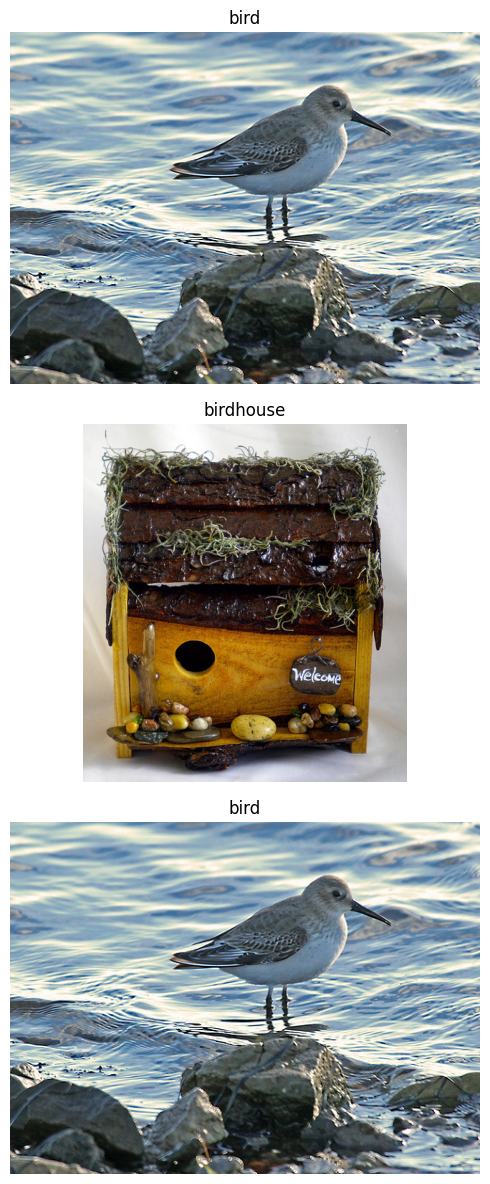

In [228]:
def show_three_by_synset(df, names, root="images_localization/ILSVRC/Data/CLS-LOC/val"):

    imgs = []
    print(root)
    for name in names:
        rows = df[df["mapped_name"] == name]
        if len(rows) == 0:
            imgs.append((None, name))
            continue
        row = rows.iloc[0]                   # pick one example
        path = f"{root}/{row['ImageId']}.JPEG"
        print(path)
        img = Image.open(path)
        imgs.append((img, name))

    fig, axes = plt.subplots(3, 1, figsize=(5, 12))

    for ax, (im, title) in zip(axes, imgs):
        if im is None:
            ax.text(0.5, 0.5, "not found", ha="center", va="center")
            ax.axis("off")
            ax.set_title(title)
            
        else:
            ax.imshow(im)
            ax.axis("off")
            ax.set_title(title)

    plt.tight_layout()
    plt.savefig("test.png")
    plt.show()

show_three_by_synset(merged, ["bird", "birdhouse", "bird"])

In [245]:
def show_triplet(df,names,root):
    for name in names:
        rows = df[df["mapped_name"] == name]

    sample = rows.sample(3)
    print(sample["mapped_name"])

    paths = [
        f"{root}/{img_id}.JPEG"
        for img_id in sample["ImageId"]
    ]

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    for ax, path in zip(axes, paths):
        img = Image.open(path)
        ax.imshow(img)
        ax.set_title(sample["mapped_name"])
        ax.axis("off")

    plt.tight_layout()
    plt.show()

show_triplet(merged, ["bird", "fox", "birdhouse"], "images_localization/ILSVRC/Data/CLS-LOC/val")

ValueError: Cannot take a larger sample than population when 'replace=False'

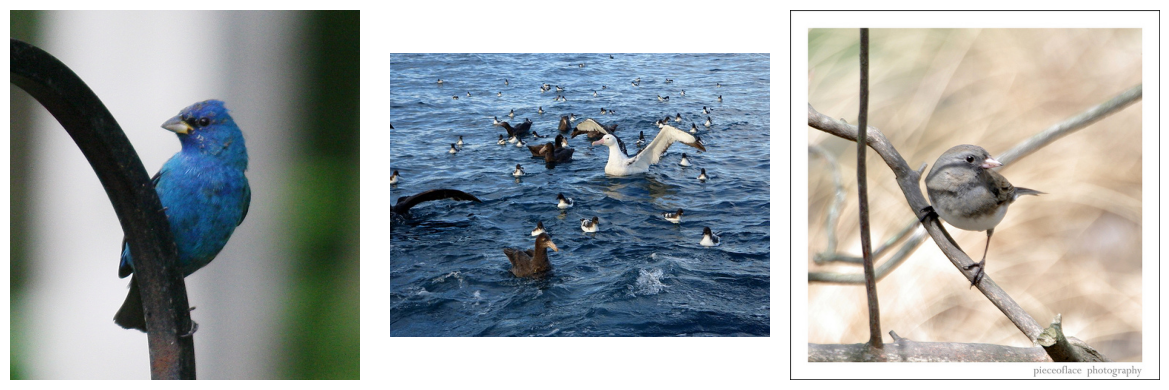

In [ ]:

def show_three_from_synset(df, syn_name, root):
    """
    df: dataframe with columns 'synset_name' and 'ImageId'
    syn_name: e.g. "bird"
    root: base path to ImageNet val images
    """
    rows = df[df["mapped_name"] == syn_name]

    if len(rows) < 3:
        raise ValueError("Not enough images for this synset.")

    sample = rows.sample(3, replace=False)

    paths = [
        f"{root}/{img_id}.JPEG"
        for img_id in sample["ImageId"]
    ]

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    for ax, path in zip(axes, paths):
        img = Image.open(path)
        ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
show_three_from_synset(
    merged,
    "bird",
    "images_localization/ILSVRC/Data/CLS-LOC/val"
)


In [ ]:
# example subset: concreteness = 5 (modify as you like)
subset = merged[merged["mapped_concreteness"] == 5].head(10)

for _, row in subset.iterrows():
    img_path = f"images_localization/ILSVRC/Data/CLS-LOC/val/{row['ImageId']}.JPEG"
    img = Image.open(img_path)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img)
    ax.axis("off")

    # put metadata below the image
    meta = (
        f"words: {row['word_list']}\n"
        f"concreteness: {row['concreteness']}"
    )
    plt.figtext(
        0.5, -0.05, meta,
        ha="center", va="top", fontsize=10
    )

    plt.tight_layout()
    plt.show()

show_three_from_synset(
    merged,
    "bird",
    "images_localization/ILSVRC/Data/CLS-LOC/val"
)


In [ ]:
from IPython.display import display, Image
from PIL import Image as PILImage
import pandas as pd

# Example: select all rows with concreteness = 5
subset = merged[merged["concreteness"] == 5]

for _, row in subset.iterrows():
    # load the image
    img_path = f"images_localization/ILSVRC/Data/CLS-LOC/val/{row['ImageId']}.JPEG"   # adjust to your actual path
    img = PILImage.open(img_path)

    # display the image + metadata
    display(img)
    print("words:", row["word_list"])
    print("concreteness:", row["concreteness"])
    print("-" * 40)


In [18]:
merged.to_csv('Image_annotation_transformed.csv', index=False)

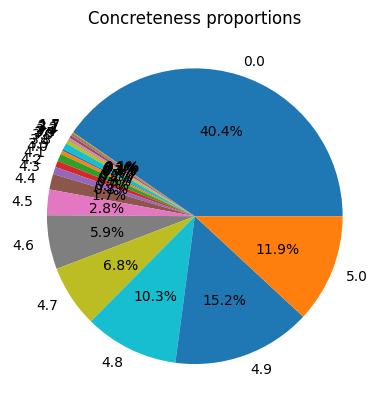

In [ ]:
merged["bucket"] = (merged["concreteness"].round(1))
counts = merged["bucket"].value_counts().sort_index()
proportions = counts / counts.sum()

proportions.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Concreteness proportions")
plt.show()

In [ ]:
df_exploded = df.explode("words")   # if wordlist column is lists
word_stats = df_exploded.groupby("words")["concreteness"].mean()


In [44]:
thresh = 4.9
# https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data?select=LOC_synset_mapping.txt

df1 = pd.read_csv("nxx_words.csv")

              
# String of words into list of words
df1["word_list"] = df1["description"].str.split(r"\s*,\s*")

# add word with highest score
df1["most concrete word"] = df1["word_list"].apply(most_concrete)

# give NaN lowest score of 0 since they dont contain a single word used in 40k concreteness
df1["concreteness"] = df1["word_list"].apply(max_conc).fillna(0)


df1["mapped_synset"] = df1.apply(
    lambda row:
        row["synset_id"] if row["concreteness"] >= thresh
        else nearest_valid_ancestor(row["synset_id"], thresh),
    axis=1
)

df1["mapped_concreteness"] = df1["mapped_synset"].map(synset_scores)

# Create a lookup from synset_id → words list
synset_words_lookup = df_synsets.set_index("synset_id")["words"]

# Add a column in df1 for the mapped word list
df1["mapped_word_list"] = df1["mapped_synset"].map(synset_words_lookup)

# description is redundant
df1 = df1.drop(columns=["description"])

pd.set_option('display.max_rows', None)
df1

,synset_id,word_list,most concrete word,concreteness,mapped_synset,mapped_concreteness,mapped_word_list
0,n01440764,"[tench, Tinca tinca]",NaN,0.00,n02512053,5.00,[fish]
1,n01443537,"[goldfish, Carassius auratus]",goldfish,4.79,n02512053,5.00,[fish]
2,n01484850,"[great white shark, white shark, man-eater, ma...",NaN,0.00,n01482330,4.93,[shark]
3,n01491361,"[tiger shark, Galeocerdo cuvieri]",NaN,0.00,n01482330,4.93,[shark]
4,n01494475,"[hammerhead, hammerhead shark]",hammerhead,4.28,n01482330,4.93,[shark]
5,n01496331,"[electric ray, crampfish, numbfish, torpedo]",torpedo,4.96,n01496331,4.96,"[electric ray, crampfish, numbfish, torpedo]"
6,n01498041,[stingray],stingray,4.90,n01498041,4.90,[stingray]
7,n01514668,[cock],cock,4.79,n01503061,5.00,[bird]
8,n01514859,[hen],hen,4.90,n01514859,4.90,[hen]
9,n01518878,"[ostrich, Struthio camelus]",ostrich,4.71,n01503061,5.00,[bird]


In [39]:
df1["mapped_synset"].nunique()


323